In [1]:
import tensorflow as tf
import sys

2025-09-30 07:26:29.155278: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(f"wersja tensorflow: {tf.__version__}")
print(f"wersja python: {sys.version_info}")

wersja tensorflow: 2.19.1
wersja python: sys.version_info(major=3, minor=11, micro=10, releaselevel='final', serial=0)


In [3]:
#ładowanie danych - mnist
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
#normalizacja danych
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
#prosty model sieci neuronowej
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/opt/python/envs/default_3_11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
predictions = model(x_train[:1]).numpy()
print(predictions)

[[ 0.46418747 -0.25476092 -0.17744556 -0.02043537 -0.0431513  -0.16552725
   0.34355092  0.6928488   0.11580072 -0.2087958 ]]


In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.14037555, 0.06840001, 0.07389819, 0.08646143, 0.08451952,
 0.0747842 , 0.12442271, 0.17644031, 0.09908069, 0.0716174 ]],
 dtype=float32)

In [8]:
#opis propagacji wstecznej
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten ( Flatten ) │ ( None , 784 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense ( Dense ) │ ( None , 128 ) │ 100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout ( Dropout ) │ ( None , 128 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 ( Dense ) │ ( None , 10 ) │ 1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 101,770 (397.54 KB)

Trainable params: 101,770 (397.54 KB)

Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9146 - loss: 0.2943
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9572 - loss: 0.1435
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9677 - loss: 0.1083
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9725 - loss: 0.0881
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9765 - loss: 0.0754
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9795 - loss: 0.0650
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9815 - loss: 0.0571
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0525
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9843 - loss: 0.0464
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9858 - loss: 0.0422
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9864 - loss: 0.0398
Epoch 12/20
1875/1875 ━

2025-09-30 07:51:49.245578: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [10]:
#ocena modelu
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.9801 - loss: 0.0814


2025-09-30 08:01:26.200138: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


[0.08141589909791946, 0.9800999760627747]

In [11]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [16]:
import numpy as np
w1 = probability_model(x_test[:1])
aw1 = np.argmax(w1)

w5 = probability_model(x_test[4:5])
aw5 = np.argmax(w5)

print(f"przewidywane obrazy: w1 -> {aw1}, w5 -> {aw5}")

przewidywane obrazy: w1 -> 7, w5 -> 4


In [17]:
print(f"realne obrazy: w1 -> {y_test[0]}, w5 -> {y_test[4]}")

realne obrazy: w1 -> 7, w5 -> 4


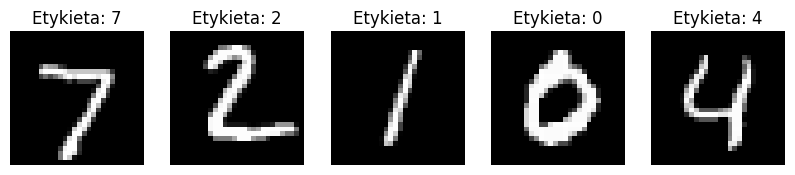

In [18]:
import matplotlib.pyplot as plt


# Wyświetlenie pierwszych 5 obrazów testowych
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"Etykieta: {y_test[i]}")
    plt.axis("off")

plt.show()